In [1]:
import os 
from general_plot import *

model_name = model_name_list[1] 


In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [ 1  2  3  4  5  6  7  8  9 10 11]
u_random: [   1    4   15   51  153  427 1127 2858]


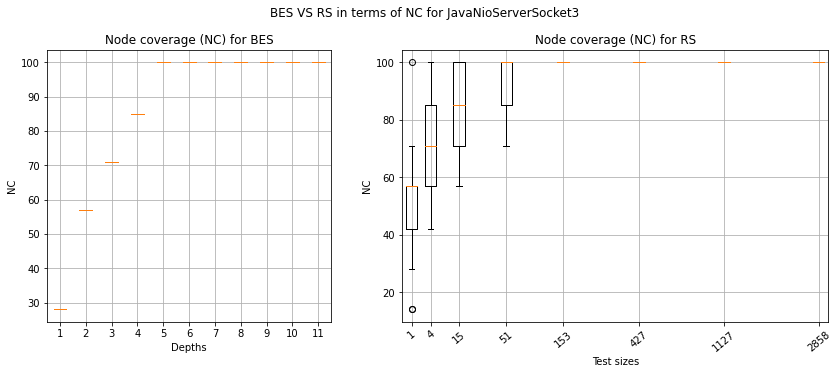

In [2]:

# repeat multi_times for each model and for each loopOpt
# init
loopOpt = False

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
map_bes= {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'title': 'Node coverage (NC) for BES',
    'x_label': 'Depths',
    'y_label': 'NC',
    'width_ratio': 1,
    'distance_to_figures': 1
}

map_rand = {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),

    'title': 'Node coverage (NC) for RS',
    'x_label': 'Test sizes',
    'y_label': 'NC',
    'width_ratio': 1.5
}

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, map_bes, map_rand)
    

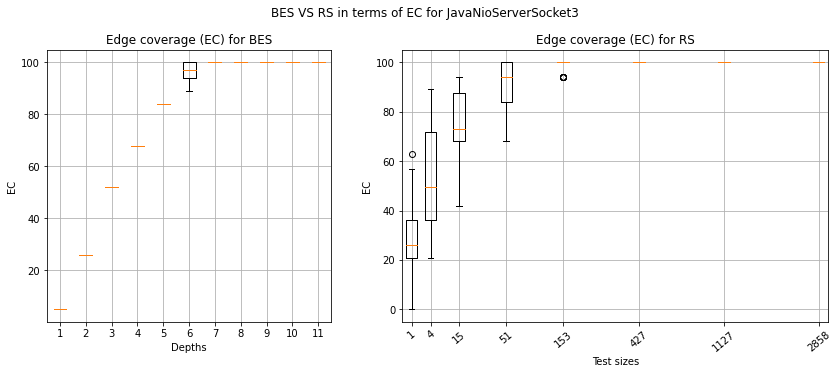

In [3]:
# ec 
coverage = 'EC'
map_bes['title'] = f'Edge coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Edge coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, map_bes, map_rand)



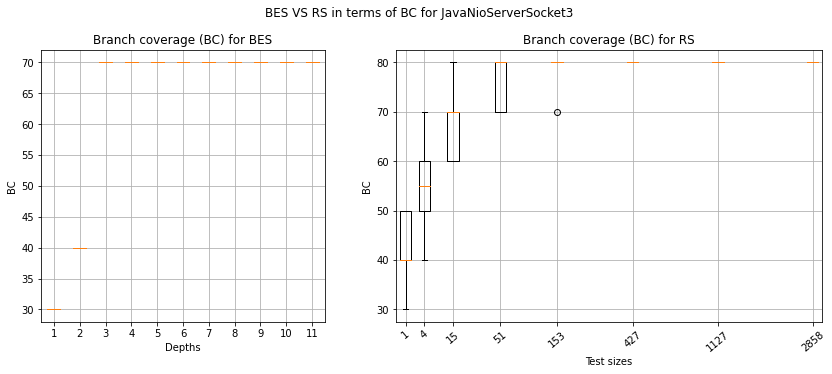

In [4]:
# bc
coverage = 'BC'  #TODO here bc are the same
map_bes['title'] = f'Branch coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Branch coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

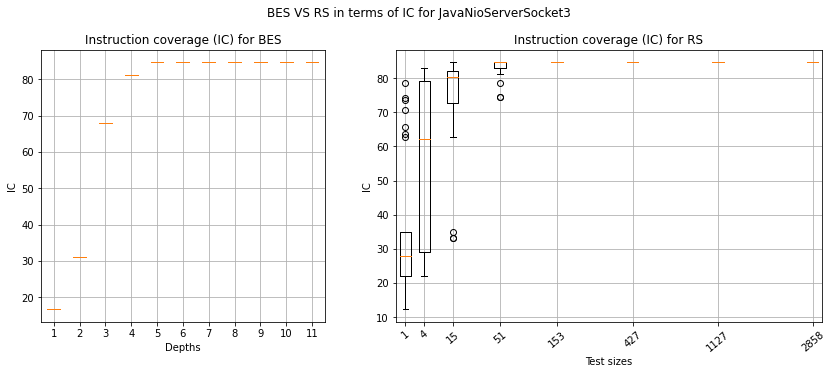

In [5]:
# ic
coverage = 'IC'
map_bes['title'] = f'Instruction coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Instruction coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [51]
depth 5 --> [153]
depth 6 --> [427]
depth 7 --> [1127]
depth 8 --> [2852, 2853, 2854, 2855, 2856, 2857, 2858, 2859, 2860, 2861, 2862]
depth 9 --> [7040, 7044, 7023, 7024, 7026, 7027, 7028, 7029, 7030, 7031, 7032, 7033, 7034, 7036, 7037, 7038, 7039]
depth 10 --> [16992, 16994, 16995, 16996, 16998, 16999, 17000, 17001, 17003, 17004, 17005, 16976, 17009, 16977, 16981, 16984, 16985, 16986, 16989, 16990]
depth 11 --> [40579, 40581, 40582, 40583, 40585, 40586, 40587, 40589, 40590, 40595, 40598, 40605, 40612, 40551, 40559, 40560, 40561, 40562, 40563, 40565, 40566, 40570, 40571, 40572, 40573]


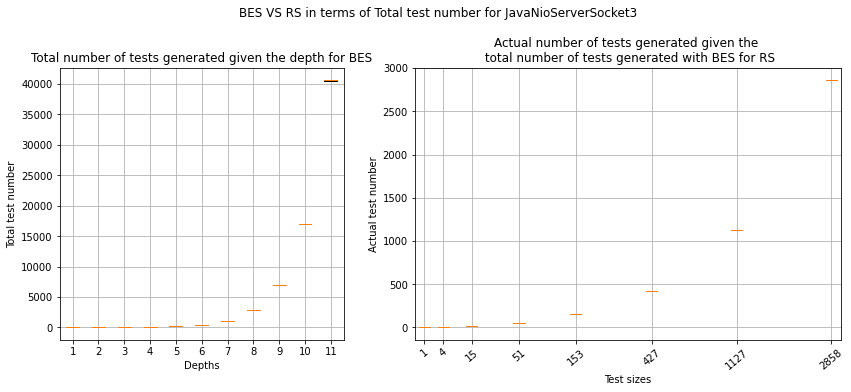

In [6]:
# total_test
creteria = 'total_tests'
map_bes['title'] = f'Total number of tests generated given the depth for BES'
map_bes['y_label'] = 'Total test number'
# 'width_ratio': 1
map_bes['distance_to_figures'] = 1.05

map_rand['title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
map_rand['y_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



depth 1 --> [1.867876052856445, 1.429033279418945, 2.010962963104248, 1.9424071311950684, 1.888033151626587, 2.141307830810547, 1.8872201442718504, 2.1135029792785645, 2.0248608589172363, 1.992674827575684, 2.0414929389953613, 2.014503002166748, 2.125317096710205, 1.8371851444244385, 1.9957079887390137, 2.1039681434631348, 2.0612196922302246, 2.0433709621429443, 2.0403871536254883, 2.0019619464874268, 1.9200258255004885, 1.964274883270264, 2.111290693283081, 2.014894723892212, 2.0387120246887207, 1.8933000564575195, 1.8917131423950195, 1.94498872756958, 1.984544038772583, 1.9970850944519043, 1.8954379558563232, 1.9313130378723145, 1.96399998664856, 1.913918256759644, 2.0371630191802983, 2.0951490402221684, 2.102288722991944, 2.0175919532775883, 2.007200002670288, 2.0692028999328613, 2.039923906326294, 2.088324785232544, 2.017254114151001, 2.117419958114624, 2.142651081085205, 2.051994800567627, 2.0144338607788086, 2.0603299140930176, 1.8484361171722408, 1.9438059329986568, 2.0062913894

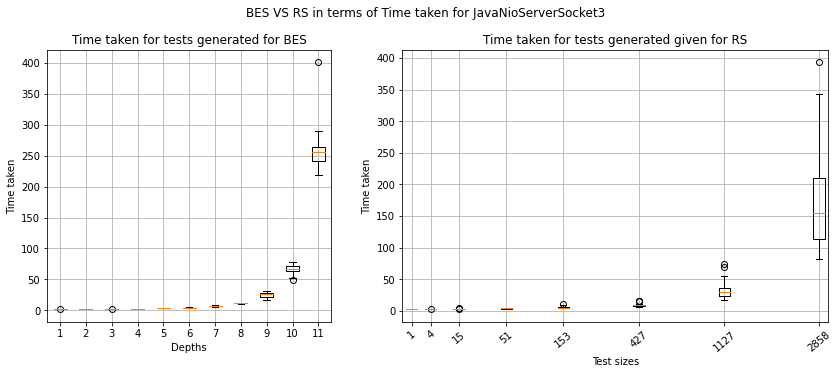

In [7]:
# time_taken
creteria = 'time_taken'
map_bes['title'] = f'Time taken for tests generated for BES'
map_bes['y_label'] = 'Time taken'
map_bes['distance_to_figures'] = 1

map_rand['title'] = f'Time taken for tests generated given for RS'
map_rand['y_label'] = 'Time taken'
map_rand['width_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



[WARNING]: not equal number in x_axis, u_bes != u_random
u_bes: [ 1  2  3  4  5  6  7  8  9 10 11]
u_random: [   1    4   15   49  140  364  879 2009]


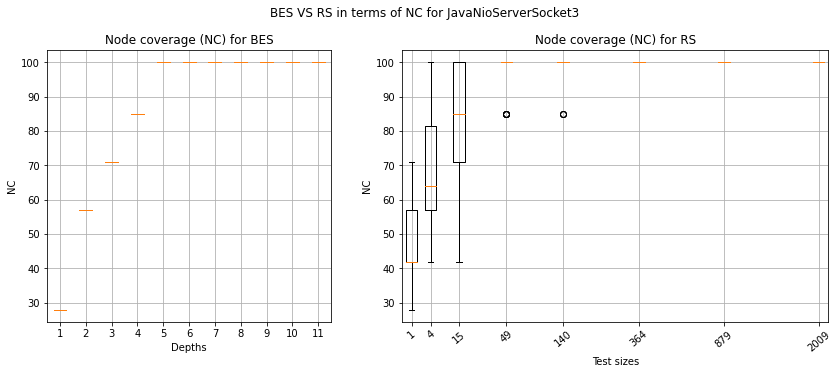

In [8]:
loopOpt = True

bes_csv, random_csv, u_bes, u_random =  get_csv_unique(model_name, loopOpt)


#nc 
map_bes= {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),
    
    'title': 'Node coverage (NC) for BES',
    'x_label': 'Depths',
    'y_label': 'NC',
    'width_ratio': 1,
    'distance_to_figures':  1
}

map_rand = {
    'model_name': model_name,
    'loopOpt': bool_to_str(loopOpt),

    'title': 'Node coverage (NC) for RS',
    'x_label': 'Test sizes',
    'y_label': 'NC',
    'width_ratio': 1.5
}

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', 'nc', u_bes, u_random, map_bes, map_rand)
    

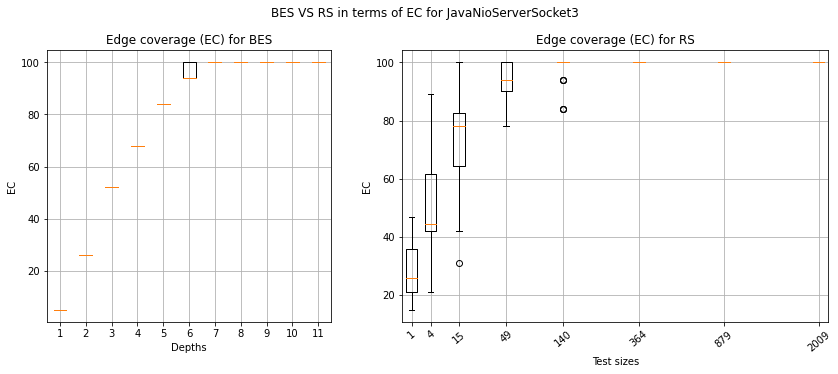

In [9]:
# ec 
coverage = 'EC'
map_bes['title'] = f'Edge coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Edge coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', coverage.lower(),
                         u_bes, u_random, map_bes, map_rand)



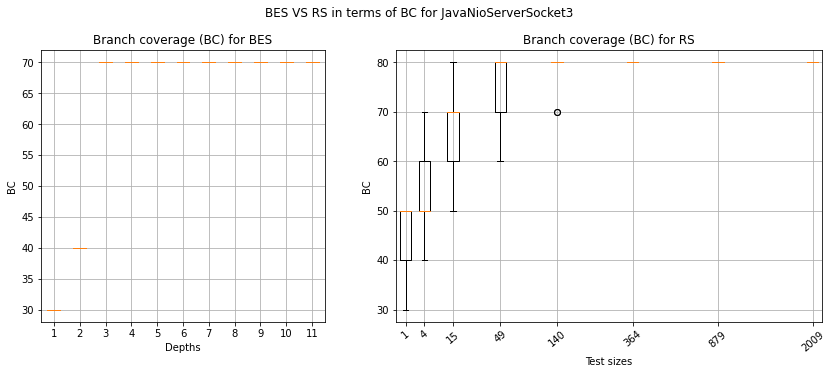

In [10]:
# bc
coverage = 'BC'  #TODO here bc are the same
map_bes['title'] = f'Branch coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Branch coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

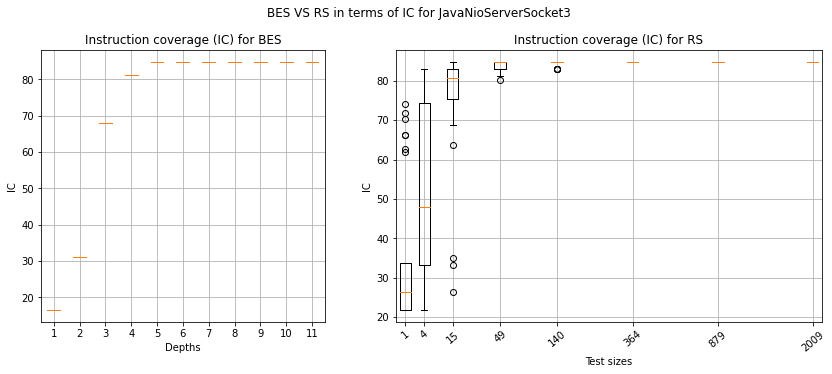

In [11]:
# ic
coverage = 'IC'
map_bes['title'] = f'Instruction coverage ({coverage}) for BES'
map_bes['y_label'] = coverage
# 'width_ratio': 1

map_rand['title'] = f'Instruction coverage ({coverage}) for RS'
map_rand['y_label'] = coverage
# 'width_ratio': 1.5


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', f'total_{coverage.lower()}',
                         u_bes, u_random, map_bes, map_rand)
    

depth 1 --> [1]
depth 2 --> [4]
depth 3 --> [15]
depth 4 --> [49]
depth 5 --> [140]
depth 6 --> [364]
depth 7 --> [879]
depth 8 --> [1999, 2000, 2001, 2002, 2003, 2004, 2006, 2008, 2009]
depth 9 --> [4384, 4385, 4386, 4387, 4388, 4389, 4391, 4392, 4393, 4394, 4401, 4376, 4377, 4378, 4380, 4382]
depth 10 --> [9350, 9354, 9355, 9356, 9357, 9358, 9359, 9361, 9363, 9364, 9366, 9368, 9372, 9374, 9376, 9381, 9383, 9384, 9385, 9390, 9394]
depth 11 --> [19781, 19785, 19789, 19791, 19794, 19795, 19797, 19798, 19800, 19802, 19803, 19804, 19805, 19808, 19810, 19812, 19815, 19822, 19823, 19825, 19827, 19835]


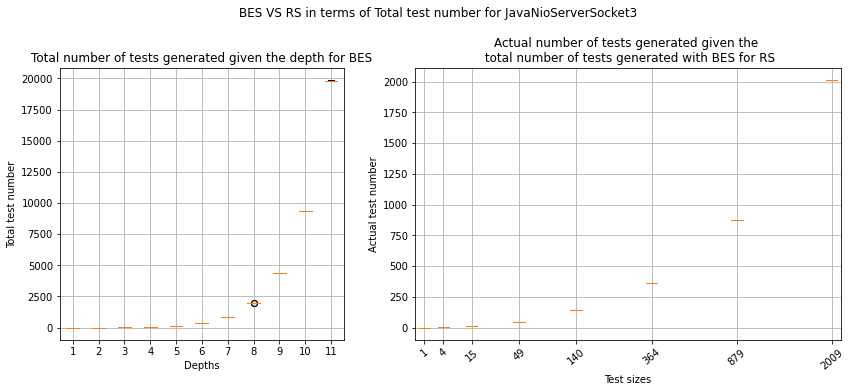

In [12]:
# total_test
creteria = 'total_tests'
map_bes['title'] = f'Total number of tests generated given the depth for BES'
map_bes['y_label'] = 'Total test number'
# 'width_ratio': 1
map_bes['distance_to_figures'] = 1.05

map_rand['title'] = f'Actual number of tests generated given the \n total number of tests generated with BES for RS'
map_rand['y_label'] = 'Actual test number'
# 'width_ratio': 1.5

total_tests = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
print_map(total_tests, 'depth')


compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



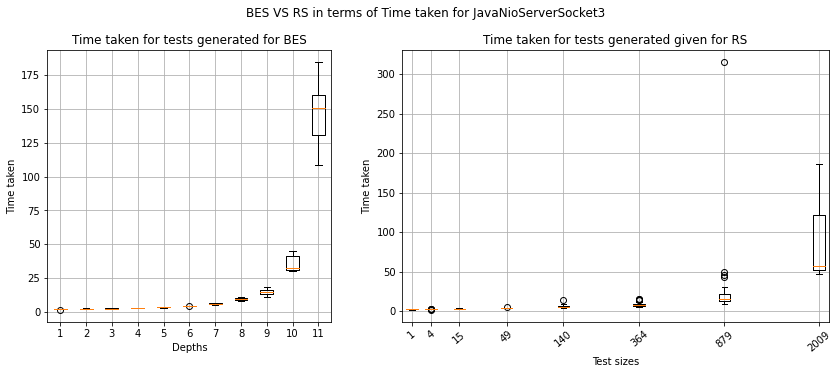

In [13]:
# time_taken
creteria = 'time_taken'
map_bes['title'] = f'Time taken for tests generated for BES'
map_bes['y_label'] = 'Time taken'
map_bes['distance_to_figures'] = 1

map_rand['title'] = f'Time taken for tests generated given for RS'
map_rand['y_label'] = 'Time taken'
map_rand['width_ratio']: 1

time_taken = extract_unique_as_map(bes_csv, u_bes, 'depth', creteria)
# print_map(time_taken, 'depth')

compare_bes_rand_given_y(bes_csv, random_csv, 'depth', 'requested_size', creteria,
                         u_bes, u_random, map_bes, map_rand)



In [14]:
# have a list of uniques depthes
# then for each depth a box plot of coverage of it and the corresponding depth



#make sure that the random didn't get a timeout before a depth





